In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
from collections import namedtuple
# Used with sklearn.linear_model.LinearRegression
# A set of K dim N vectors, K points with N features each
# data: 2d numpy array with shape (K, N)
# targets: numpy array with shape (K), the values to regress on
# Use as LinearRegression.fit(train_data, train_targets)
regrData = namedtuple('regrData', 'train_data train_targets test_data test_targets')
lin_rgr = namedtuple('lin_rgr', 'regrData intercept coeffs train_pred test_pred, train_err, test_err')

In [3]:
def regrData_Sinus(stDev:float=0.05, offset:float = 1.1, freq:float=10,
                  num_train:int=100, seed_train:int=1234,
                  num_test:int=None, seed_test:int=None,
                  max_power:int=15):
    '''fuzzy sin data and poly kernel'''
    np.random.seed(seed_train)
    xR = np.array([offset + i * freq/num_train for i in range(0, num_train)])
    yR = np.random.normal(0, stDev, num_train) + np.sin(xR)
    # xR is XR[:, 0]
    XR = np.array( [xR ** i for i in range(1, max_power)]).T
    
    if num_test is None:
        num_test = num_train
    if seed_test is None:
        seed_test = seed_train + 77
        
    xT = np.array([offset + i * freq/num_test for i in range(0, num_test)])
    XT = np.array( [xT ** i for i in range(1, max_power)]).T
    yT = np.random.normal(0, stDev, num_test) + np.sin(xT)  
        
    return regrData(train_data=XR, train_targets=yR, test_data=XT, test_targets=yT)

In [4]:
def LinRegRun(rd:regrData):
    Xr = sinusData.train_data
    yr = sinusData.train_targets
    xr = Xr[:, 0]
    Xs = sinusData.test_data
    xs = Xs[:, 0]
    ys = sinusData.test_targets

    linreg = LinearRegression(normalize=True)
    linreg.fit(Xr, yr)

    yr_pred = linreg.predict(Xr)
    ys_pred = linreg.predict(Xs)
    
    return lin_rgr(regrData = sinusData,
                 intercept = linreg.intercept_,
                 coeffs = linreg.coef_,
                 train_pred = yr_pred,
                 test_pred = ys_pred,
                 train_err = sum((yr_pred-yr)**2),
                 test_err = sum((ys_pred-ys)**2))

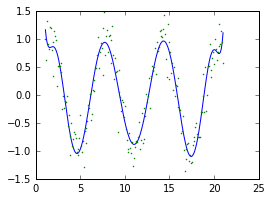

In [13]:
sinusData = regrData_Sinus(num_train=200, num_test=200, stDev=0.25, freq=20, max_power=12)
lrResults = LinRegRun(rd=sinusData)

rcParams['figure.figsize'] = 4, 3
plt.plot(lrResults.regrData.test_data[:,0], lrResults.test_pred)
plt.plot(lrResults.regrData.train_data[:,0], lrResults.regrData.train_targets,'.', markersize=2)
plt.show()

In [14]:
sinusData.train_data.shape

(200, 11)